# Df 1 0 2_ Nano A O D Dimuon Analysis
This tutorial illustrates how NanoAOD files can be processed with ROOT
dataframes. The NanoAOD-like input files are filled with 66 mio. events
from CMS OpenData containing muon candidates part of 2012 dataset
([DOI: 10.7483/OPENDATA.CMS.YLIC.86ZZ](http://opendata.cern.ch/record/6004)
and [DOI: 10.7483/OPENDATA.CMS.M5AD.Y3V3](http://opendata.cern.ch/record/6030)).
The macro matches muon pairs and produces an histogram of the dimuon mass
spectrum showing resonances up to the Z mass.
Note that the bump at 30 GeV is not a resonance but a trigger effect.

Some more details about the dataset:
  - It contains about 66 millions events (muon and electron collections, plus some other information, e.g. about primary vertices)
  - It spans two compressed ROOT files located on EOS for about a total size of 7.5 GB.




**Author:** Stefan Wunsch (KIT, CERN)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:21 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Enable multi-threading

In [2]:
ROOT.ROOT.EnableImplicitMT()

Create dataframe from NanoAOD files

In [3]:
files = ROOT.std.vector("string")(2)
files[0] = "root://eospublic.cern.ch//eos/root-eos/cms_opendata_2012_nanoaod/Run2012B_DoubleMuParked.root"
files[1] = "root://eospublic.cern.ch//eos/root-eos/cms_opendata_2012_nanoaod/Run2012C_DoubleMuParked.root"
df = ROOT.ROOT.RDataFrame("Events", files)

For simplicity, select only events with exactly two muons and require opposite charge

In [4]:
df_2mu = df.Filter("nMuon == 2", "Events with exactly two muons")
df_os = df_2mu.Filter("Muon_charge[0] != Muon_charge[1]", "Muons with opposite charge")

secgsi: unknown CA: cannot verify server certificate


Compute invariant mass of the dimuon system

In [5]:
df_mass = df_os.Define("Dimuon_mass", "InvariantMass(Muon_pt, Muon_eta, Muon_phi, Muon_mass)")

Make histogram of dimuon mass spectrum

In [6]:
h = df_mass.Histo1D(("Dimuon_mass", "Dimuon_mass", 30000, 0.25, 300), "Dimuon_mass")

Request cut-flow report

In [7]:
report = df_mass.Report()

Produce plot

In [8]:
ROOT.gStyle.SetOptStat(0); ROOT.gStyle.SetTextFont(42)
c = ROOT.TCanvas("c", "", 800, 700)
c.SetLogx(); c.SetLogy()

h.SetTitle("")
h.GetXaxis().SetTitle("m_{#mu#mu} (GeV)"); h.GetXaxis().SetTitleSize(0.04)
h.GetYaxis().SetTitle("N_{Events}"); h.GetYaxis().SetTitleSize(0.04)
h.Draw()

label = ROOT.TLatex(); label.SetNDC(True)
label.DrawLatex(0.175, 0.740, "#eta")
label.DrawLatex(0.205, 0.775, "#rho,#omega")
label.DrawLatex(0.270, 0.740, "#phi")
label.DrawLatex(0.400, 0.800, "J/#psi")
label.DrawLatex(0.415, 0.670, "#psi'")
label.DrawLatex(0.485, 0.700, "Y(1,2,3S)")
label.DrawLatex(0.755, 0.680, "Z")
label.SetTextSize(0.040); label.DrawLatex(0.100, 0.920, "#bf{CMS Open Data}")
label.SetTextSize(0.030); label.DrawLatex(0.630, 0.920, "#sqrt{s} = 8 TeV, L_{int} = 11.6 fb^{-1}")

c.SaveAs("dimuon_spectrum.pdf")

Print cut-flow report

In [9]:
report.Print()

Events with exactly two muons: pass=33370298   all=66128870   -- eff=50.46 % cumulative eff=50.46 %
Muons with opposite charge: pass=25794885   all=33370298   -- eff=77.30 % cumulative eff=39.01 %


Draw all canvases 

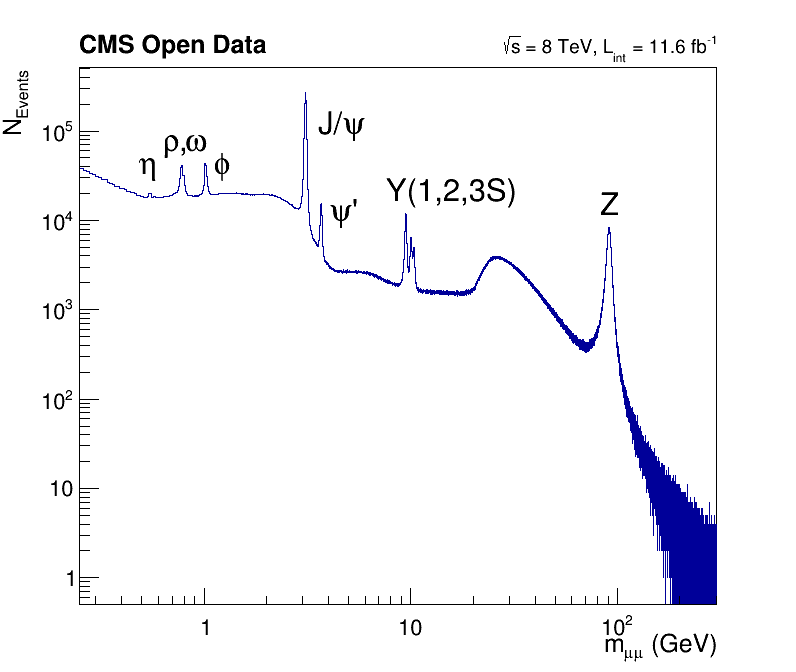

In [10]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()